In [10]:
# Import packages
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import socket 

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [11]:
%load_ext dotenv
%dotenv ../.env

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [12]:
con = create_engine(os.getenv('BUILD_ENGINE').replace('localhost', os.getenv('IP')))

In [13]:
df = pd.read_sql(sql='select * from pluto limit 1', con=con)

In [14]:
','.join([i for i in df.columns])

'borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited'

In [15]:
# Specify latest PLUTO version
pluto = 'pluto'
# Specify previous PLUTO version or the one you want to compare to
plutoprev = 'dcp_pluto'

condition = ''

In [16]:
sql = '''
SELECT
    count(*) as total,
    count(nullif(a.borough = b.borough, true)) as borough,
    count(nullif(a.block = b.block, true)) as block,
    count(nullif(a.lot = b.lot, true)) as lot,
    count(nullif(a.cd = b.cd, true)) as cd,
    count(nullif(a.ct2010 = b.ct2010, true)) as ct2010,
    count(nullif(a.cb2010 = b.cb2010, true)) as cb2010,
    count(nullif(a.schooldist = b.schooldist, true)) as schooldist,
    count(nullif(a.council = b.council, true)) as council,
    count(nullif(a.zipcode = b.zipcode, true)) as zipcode,
    count(nullif(a.firecomp = b.firecomp, true)) as firecomp,
    count(nullif(a.policeprct = b.policeprct, true)) as policeprct,
    count(nullif(a.healtharea = b.healtharea, true)) as healtharea,
    count(nullif(a.sanitboro = b.sanitboro, true)) as sanitboro,
    count(nullif(a.sanitsub = b.sanitsub, true)) as sanitsub,
    count(nullif(a.address = b.address, true)) as address,
    
    count(nullif(a.zonedist1 = b.zonedist1, true)) as zonedist1,
    count(nullif(a.zonedist2 = b.zonedist2, true)) as zonedist2,
    count(nullif(a.zonedist3 = b.zonedist3, true)) as zonedist3,
    count(nullif(a.zonedist4 = b.zonedist4, true)) as zonedist4,
    count(nullif(a.overlay1 = b.overlay1, true)) as overlay1,
    count(nullif(a.overlay2 = b.overlay2, true)) as overlay2,
    count(nullif(a.spdist1 = b.spdist1, true)) as spdist1,
    count(nullif(a.spdist2 = b.spdist2, true)) as spdist2,
    count(nullif(a.spdist3 = b.spdist3, true)) as spdist3,
    count(nullif(a.ltdheight = b.ltdheight, true)) as ltdheight,
    count(nullif(a.splitzone = b.splitzone, true)) as splitzone,
    
    count(nullif(a.bldgclass = b.bldgclass, true)) as bldgclass,
    count(nullif(a.landuse = b.landuse, true)) as landuse,
    count(nullif(a.easements = b.easements, true)) as easements,
    count(nullif(a.ownertype = b.ownertype, true)) as ownertype,
    count(nullif(a.ownername = b.ownername, true)) as ownername,
    
    count(nullif(a.lotarea = b.lotarea, true)) as lotarea,
    count(nullif(a.bldgarea = b.bldgarea, true)) as bldgarea,
    count(nullif(a.comarea = b.comarea, true)) as comarea,
    count(nullif(a.resarea = b.resarea, true)) as resarea,
    count(nullif(a.officearea = b.officearea, true)) as officearea,
    count(nullif(a.retailarea = b.retailarea, true)) as retailarea,
    count(nullif(a.garagearea = b.garagearea, true)) as garagearea,
    count(nullif(a.strgearea = b.strgearea, true)) as strgearea,
    count(nullif(a.factryarea = b.factryarea, true)) as factryarea,
    count(nullif(a.otherarea = b.otherarea, true)) as otherarea,
    count(nullif(a.areasource = b.areasource, true)) as areasource,
    count(nullif(a.numbldgs = b.numbldgs, true)) as numbldgs,
    count(nullif(a.numfloors = b.numfloors, true)) as numfloors,
    count(nullif(a.unitsres = b.unitsres, true)) as unitsres,
    count(nullif(a.unitstotal = b.unitstotal, true)) as unitstotal,
    count(nullif(a.lotfront = b.lotfront, true)) as lotfront,
    count(nullif(a.lotdepth = b.lotdepth, true)) as lotdepth,
    count(nullif(a.bldgfront = b.bldgfront, true)) as bldgfront,
    count(nullif(a.bldgdepth = b.bldgdepth, true)) as bldgdepth,
    count(nullif(a.ext = b.ext, true)) as ext,
    count(nullif(a.proxcode = b.proxcode, true)) as proxcode,
    count(nullif(a.irrlotcode = b.irrlotcode, true)) as irrlotcode,
    count(nullif(a.lottype = b.lottype, true)) as lottype,
    count(nullif(a.bsmtcode = b.bsmtcode, true)) as bsmtcode,
    
    count(nullif(abs(a.assessland::numeric-b.assessland::numeric) <10, true)) as assessland,
    count(nullif(abs(a.assesstot::numeric-b.assesstot::numeric) <10, true)) as assesstot,
    count(nullif(abs(a.exempttot::numeric-b.exempttot::numeric) <10, true)) as exempttot,
    
    count(nullif(a.yearbuilt = b.yearbuilt, true)) as yearbuilt,
    count(nullif(a.yearalter1 = b.yearalter1, true)) as yearalter1,
    count(nullif(a.yearalter2 = b.yearalter2, true)) as yearalter2,
    count(nullif(a.histdist = b.histdist, true)) as histdist,
    count(nullif(a.landmark = b.landmark, true)) as landmark,
    count(nullif(a.builtfar = b.builtfar, true)) as builtfar,
    count(nullif(a.residfar = b.residfar, true)) as residfar,
    count(nullif(a.commfar = b.commfar, true)) as commfar,
    count(nullif(a.facilfar = b.facilfar, true)) as facilfar,
    count(nullif(a.borocode = b.borocode, true)) as borocode,
    count(nullif(a.bbl = b.bbl, true)) as bbl,
    count(nullif(a.condono = b.condono, true)) as condono,
    count(nullif(a.tract2010 = b.tract2010, true)) as tract2010,
    count(nullif(a.xcoord::text = b.xcoord::text, true)) as xcoord,
    count(nullif(a.ycoord::text = b.ycoord::text, true)) as ycoord,
    count(nullif(a.zonemap = b.zonemap, true)) as zonemap,
    count(nullif(a.zmcode = b.zmcode, true)) as zmcode,
    count(nullif(a.sanborn = b.sanborn, true)) as sanborn,
    count(nullif(a.taxmap = b.taxmap, true)) as taxmap,
    count(nullif(a.edesignum = b.edesignum, true)) as edesignum,
    count(nullif(a.appbbl = b.appbbl, true)) as appbbl,
    count(nullif(a.appdate = b.appdate, true)) as appdate,
    count(nullif(a.plutomapid = b.plutomapid, true)) as plutomapid,
    count(nullif(a.version = b.version, true)) as version,
    count(nullif(a.sanitdistrict = b.sanitdistrict, true)) as sanitdistrict,
    count(nullif(a.healthcenterdistrict = b.healthcenterdistrict, true)) as healthcenterdistrict,
    count(nullif(a.firm07_flag = b.firm07_flag, true)) as firm07_flag,
    count(nullif(a.pfirm15_flag = b.pfirm15_flag, true)) as pfirm15_flag,
    count(nullif(a.rpaddate = b.rpaddate, true)) as rpaddate,
    count(nullif(a.dcasdate = b.dcasdate, true)) as dcasdate,
    count(nullif(a.zoningdate = b.zoningdate, true)) as zoningdate,
    count(nullif(a.landmkdate = b.landmkdate, true)) as landmkdate,
    count(nullif(a.basempdate = b.basempdate, true)) as basempdate,
    count(nullif(a.masdate = b.masdate, true)) as masdate,
    count(nullif(a.polidate = b.polidate, true)) as polidate,
    count(nullif(a.edesigdate = b.edesigdate, true)) as edesigdate
    FROM {} a
INNER JOIN {} b
USING (bbl)
{}
'''

In [17]:
sql1 = sql.format(pluto, plutoprev, condition)

In [18]:
%%time
df = pd.read_sql(sql=sql1, con=con)

CPU times: user 18.2 ms, sys: 9.11 ms, total: 27.3 ms
Wall time: 7.88 s


In [19]:
df

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,859459,0,0,0,0,826902,32,2,0,0,0,0,0,1,21,806,6,6,0,0,0,0,0,0,0,0,157,60,2,0,0,13299,2339,2,8,5,2,0,3,1,1,8,3,0,0,0,0,7825,7825,5525,5525,0,0,2,13,133,0,0,0,25215,0,0,0,0,1,204,70,206,0,0,0,0,179,179,0,0,112,2,0,0,0,202,0,2,0,0,0,0,0,0,0,0,0,0,0


In [20]:
total = df.loc[0, 'total']
df_pct = df.loc[0, df.columns != 'total']/total
df_pct['total'] = total

In [21]:
finance_columns = ['assessland', 'assesstot', 'exempttot', 
                   'builtfar', 'residfar', 'commfar', 'facilfar', 
                   'taxmap', 'appbbl', 'appdate']

In [22]:
area_columns = ['lotarea', 'bldgarea', 'comarea', 'resarea', 
                 'officearea', 'retailarea', 'garagearea', 'strgearea', 
                 'factryarea', 'otherarea', 'areasource']

In [23]:
zoning_columns = ['zonedist1', 'zonedist2', 'zonedist3', 'zonedist4', 
                  'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3', 
                  'ltdheight', 'splitzone', 'zonemap', 'zmcode', 'edesignum']

In [24]:
geo_columns = ['cd', 'ct2010', 'cb2010', 'schooldist',
               'council', 'zipcode', 'firecomp', 'policeprct', 
               'healtharea', 'sanitboro', 'sanitsub', 'address',
               'borocode', 'bbl', 'tract2010', 'xcoord', 'ycoord', 
               'sanborn', 'edesignum', 'sanitdistrict', 
               'healthcenterdistrict', 'histdist', 'firm07_flag', 'pfirm15_flag']

In [25]:
bldg_columns = ['bldgclass', 'landuse', 'easements', 'ownertype', 
                'ownername', 'numbldgs', 'numfloors', 'unitsres', 
                'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 
                'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 
                'lottype', 'bsmtcode', 'yearbuilt', 'yearalter1',
                'yearalter2', 'landmark', 'condono']

In [26]:
other_columns = ['plutomapid', 'version', 
                 'dcasdate', 'zoningdate', 'landmkdate',
                 'basempdate', 'masdate', 'polidate', 'edesigdate']

In [27]:
def create_plot(df_pct, column_group, title_name=''):
    total = df_pct['total']
    plt.figure(figsize=(25, 5))
    plt.plot(range(len(column_group)),df_pct[column_group])
    for i in range(len(column_group)):
        val = df_pct[column_group[i]]
        if val >= 0.1:
            plt.text(y=val, x =i-0.15, s = f'{np.round(val*100, 2)}% count: {int(round(val*total))}', size = 10, color = 'red', rotation='30')
        else:
            plt.text(y=val, x =i-0.15, s = f'count: {int(round(val*total))}', size = 10, color = 'red', rotation='35')
        
    plt.xticks(range(len(column_group)), column_group, rotation='30', fontsize='large')
    plt.xlabel('columns')
    plt.ylabel('difference')
    plt.title(title_name, fontsize='xx-large')
    plt.show()

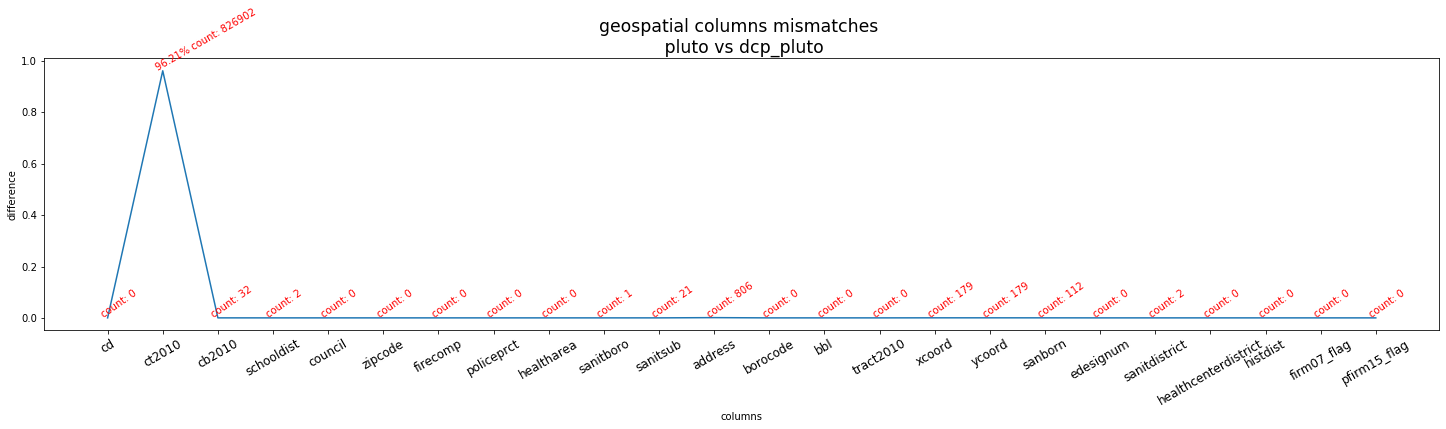

In [28]:
create_plot(df_pct, geo_columns, f'geospatial columns mismatches \n {pluto} vs {plutoprev}')

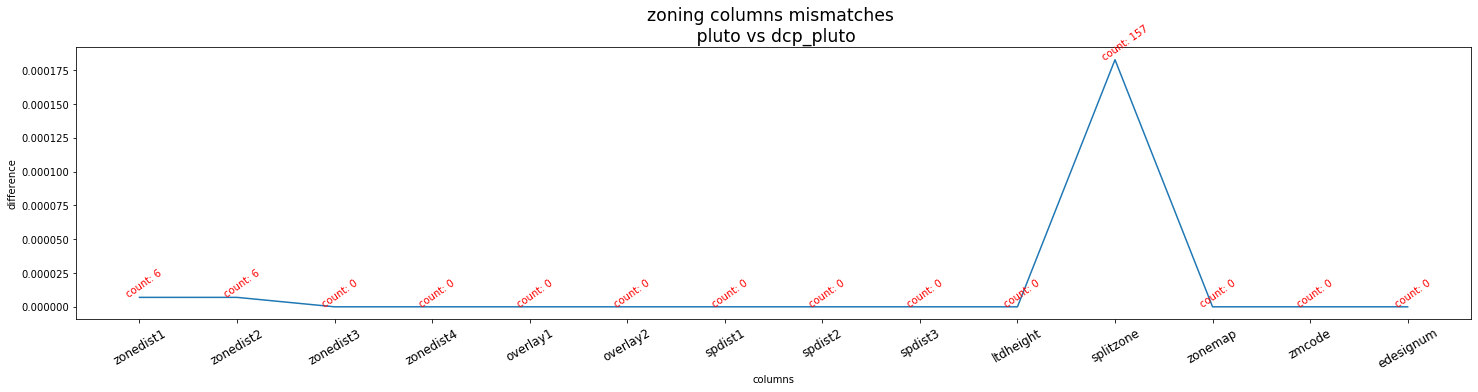

In [29]:
create_plot(df_pct, zoning_columns,  f'zoning columns mismatches \n {pluto} vs {plutoprev}')

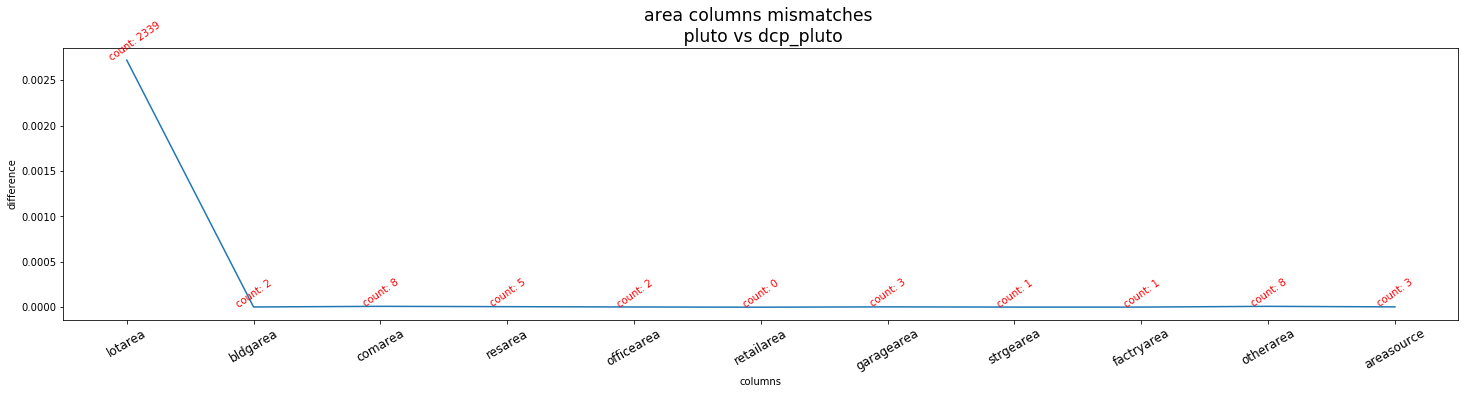

In [30]:
create_plot(df_pct, area_columns,  f'area columns mismatches \n {pluto} vs {plutoprev}')

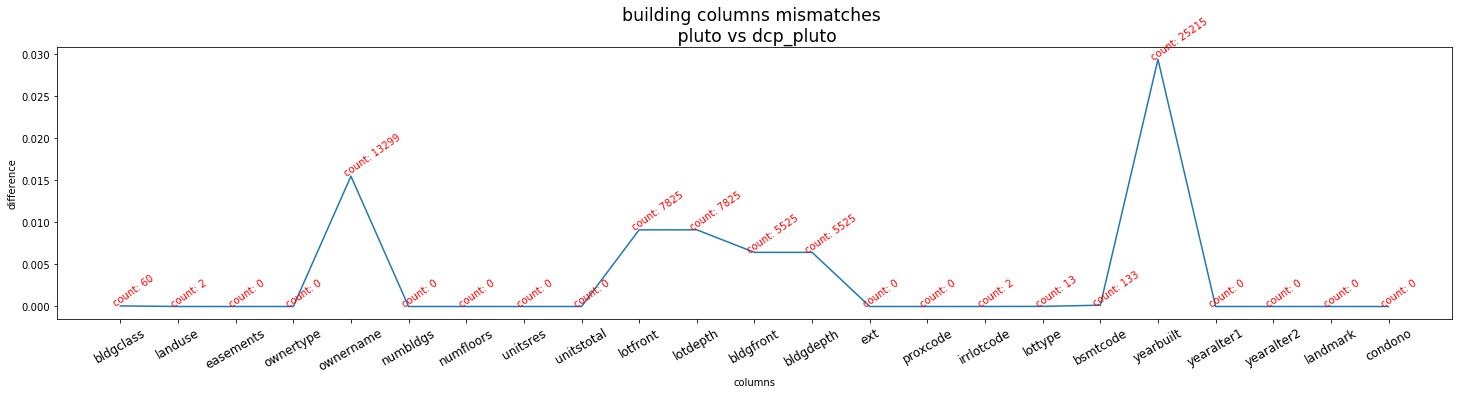

In [31]:
create_plot(df_pct, bldg_columns,  f'building columns mismatches \n {pluto} vs {plutoprev}')

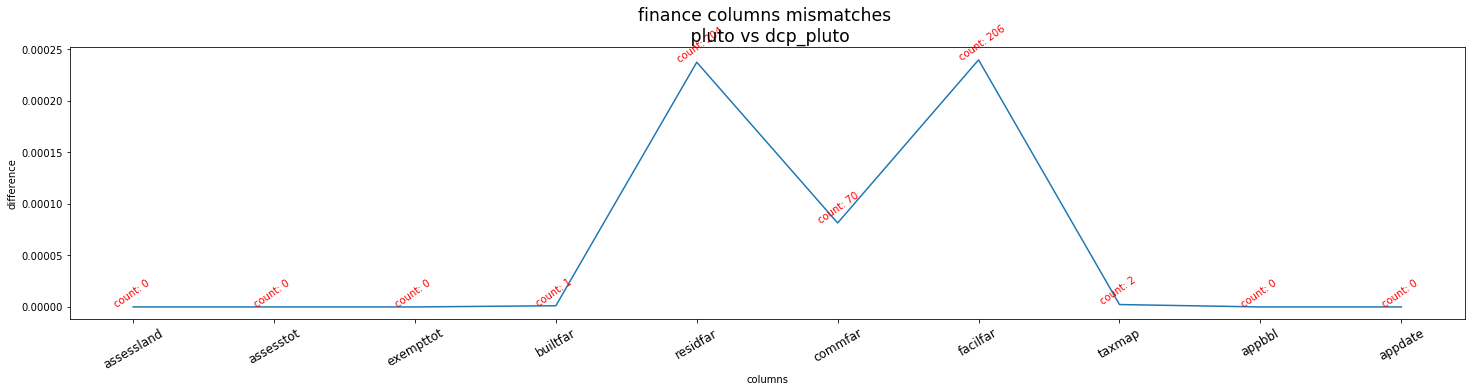

In [32]:
create_plot(df_pct, finance_columns,  f'finance columns mismatches \n {pluto} vs {plutoprev}')

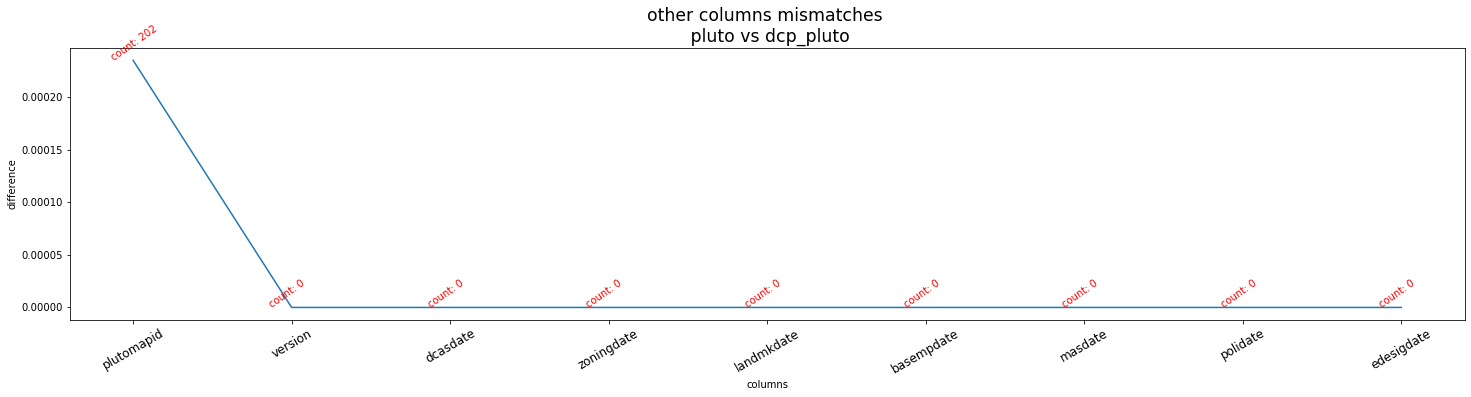

In [33]:
create_plot(df_pct, other_columns,  f'other columns mismatches \n {pluto} vs {plutoprev}')

# Condo

In [34]:
condition_condo = "WHERE right(bbl, 4) LIKE '75%%'"
sql2 = sql.format(pluto, plutoprev, condition_condo)

In [35]:
df_condo = pd.read_sql(sql=sql2, con=con)

In [36]:
df_condo

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,8476,0,0,0,0,8351,32,2,0,0,0,0,0,1,21,805,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7515,7515,4855,4855,0,0,2,13,133,0,0,0,775,0,0,0,0,0,17,8,17,0,0,0,0,179,179,0,0,112,2,0,0,0,17,0,2,0,0,0,0,0,0,0,0,0,0,0


In [37]:
total = df_condo.loc[0, 'total']
df_condo_pct = df_condo.loc[0, df_condo.columns != 'total']/total
df_condo_pct['total'] = total

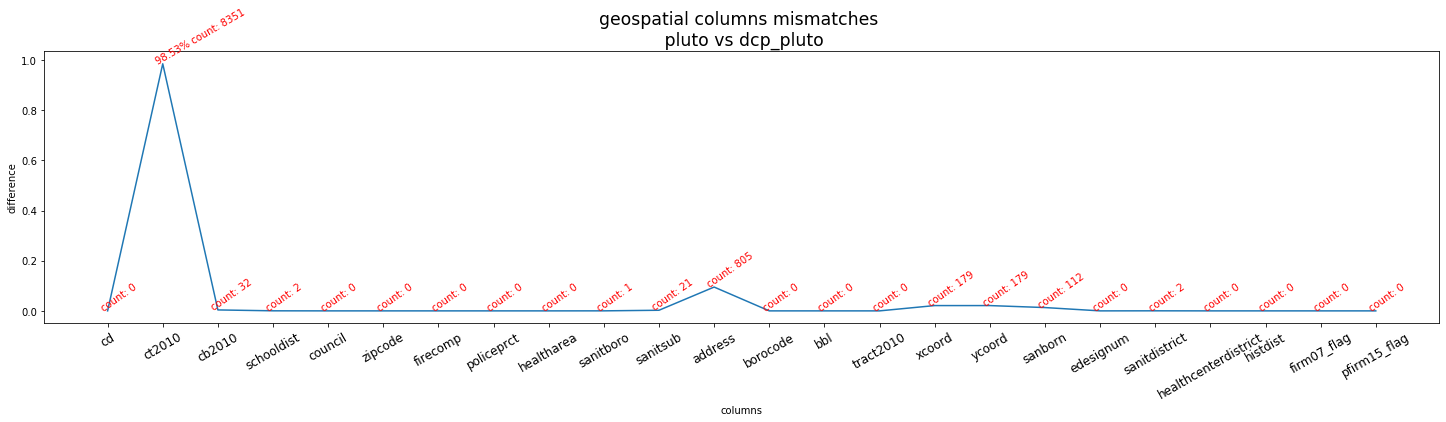

In [38]:
create_plot(df_condo_pct, geo_columns, f'geospatial columns mismatches \n {pluto} vs {plutoprev}')

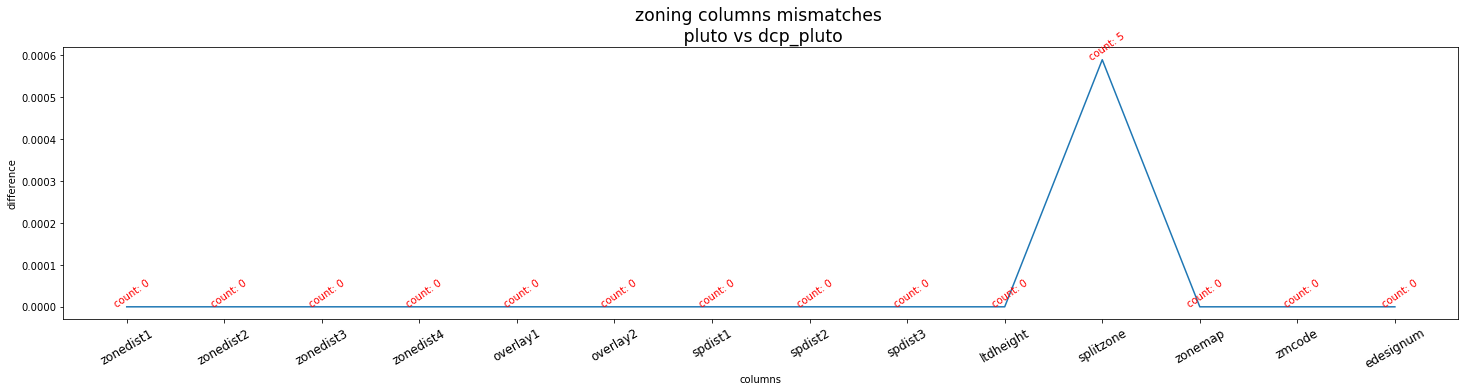

In [39]:
create_plot(df_condo_pct, zoning_columns,  f'zoning columns mismatches \n {pluto} vs {plutoprev}')

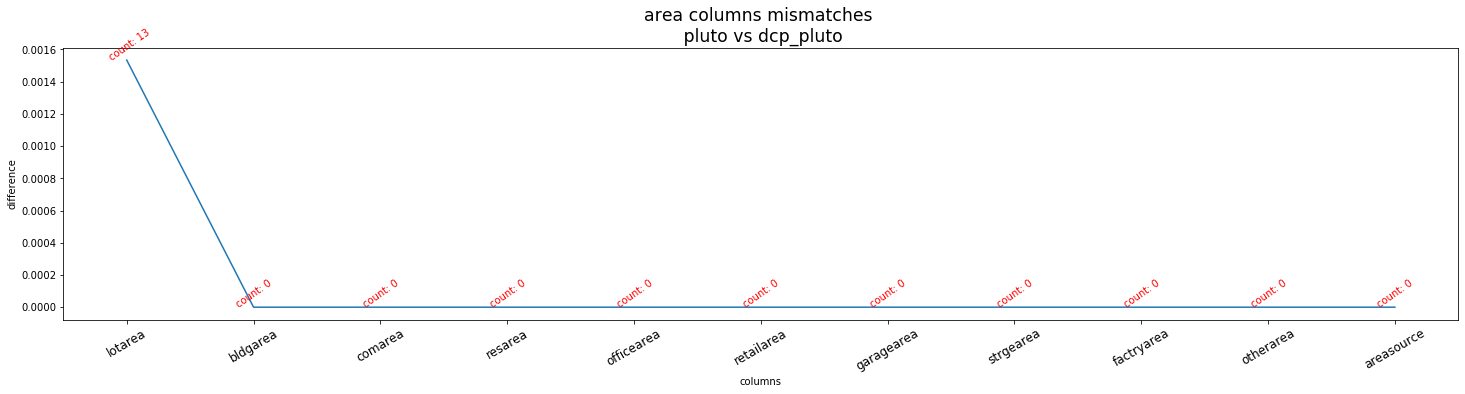

In [40]:
create_plot(df_condo_pct, area_columns,  f'area columns mismatches \n {pluto} vs {plutoprev}')

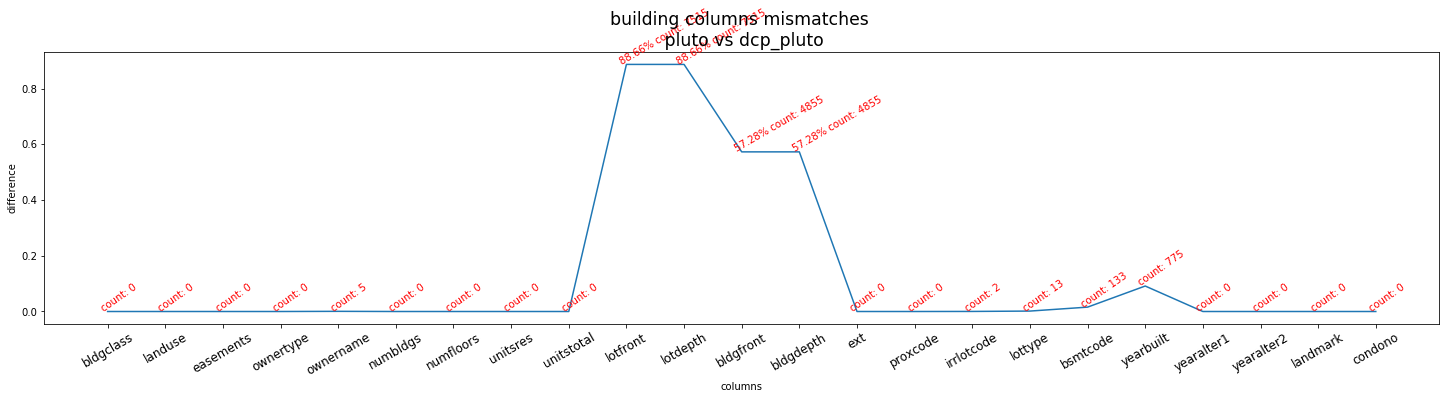

In [41]:
create_plot(df_condo_pct, bldg_columns,  f'building columns mismatches \n {pluto} vs {plutoprev}')

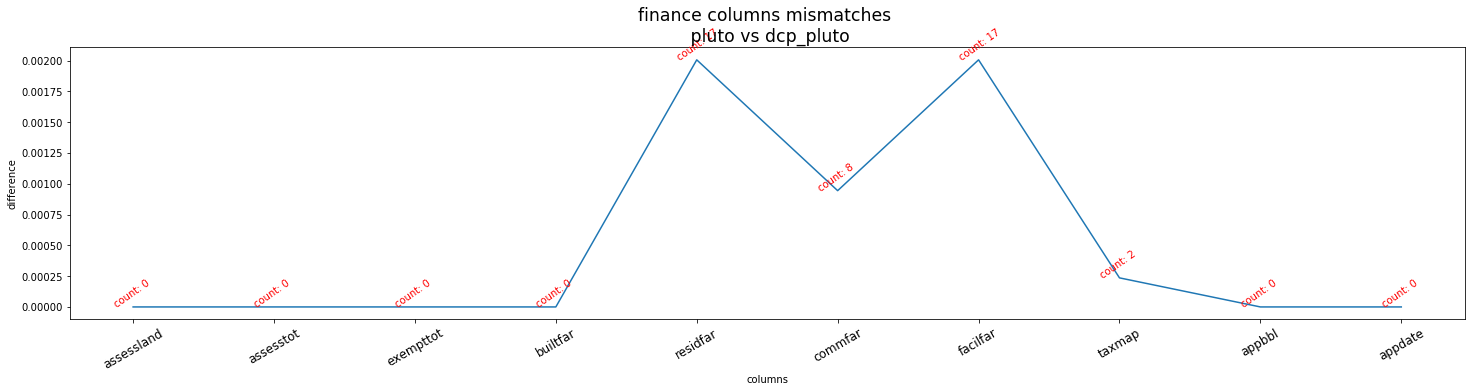

In [42]:
create_plot(df_condo_pct, finance_columns,  f'finance columns mismatches \n {pluto} vs {plutoprev}')

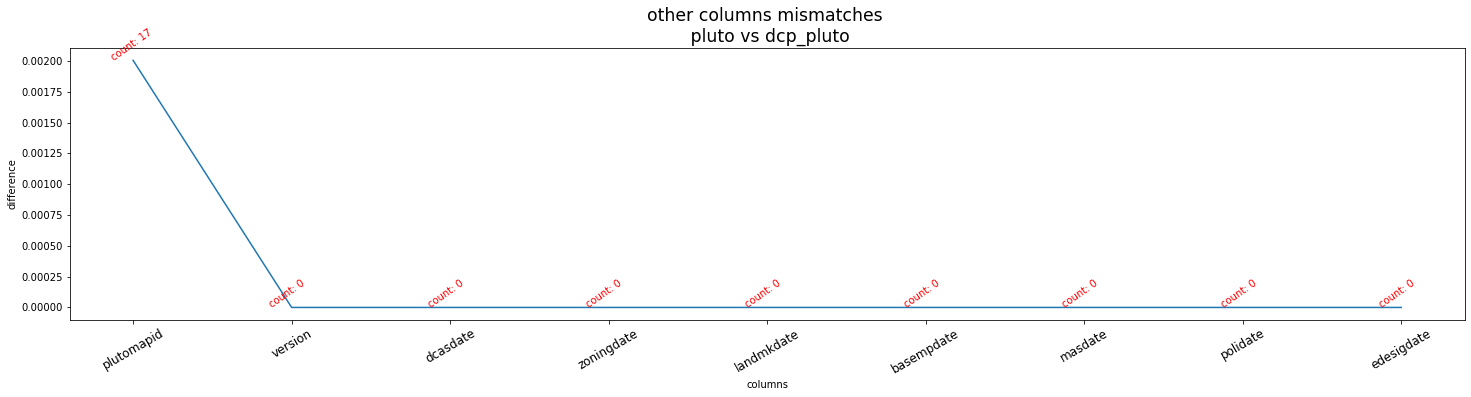

In [43]:
create_plot(df_condo_pct, other_columns,  f'other columns mismatches \n {pluto} vs {plutoprev}')

## Value change distribution plots

In [207]:
# area_columns = ['lotarea', 'bldgarea', 'comarea', 'resarea', 
#                  'officearea', 'retailarea', 'garagearea', 'strgearea', 
#                  'factryarea', 'otherarea', 'areasource']

In [208]:
# sql = f'''
# WITH pluto as (
# 	select log(lotarea::numeric) as lotarea
# 	FROM dcp_pluto.latest
# 	WHERE lotarea is not NULL and lotarea::numeric > 0
# ), mean_std as (
# 	select 
# 		avg(lotarea) as mean,
# 		stddev_samp(lotarea) as std
# 	FROM pluto
# ), min_max as (
# 	select 
# 		mean - 2*std as min_val, 
# 		mean + 2*std as max_val 
# 	from mean_std
# )
# select
# 	min(lotarea), 
# 	max(lotarea), 
# 	width_bucket(lotarea, min_val, max_val, 1000) as bucket, count(*) as count
# FROM pluto b, min_max a
# group by bucket
# order by bucket;
# '''

In [209]:
# df = pd.read_sql(sql=sql, con=con)

In [210]:
# df.head()

In [211]:
# df['count'].plot()